# Predicting the quality of Wine

## Data exploration , Preprocessing and cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('14winequality-red (1).csv')


In [3]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine.shape

(1599, 12)

In [6]:

wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [8]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [10]:
import warnings                              #removes the future warning tabs
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



## Data visualization

### histogram

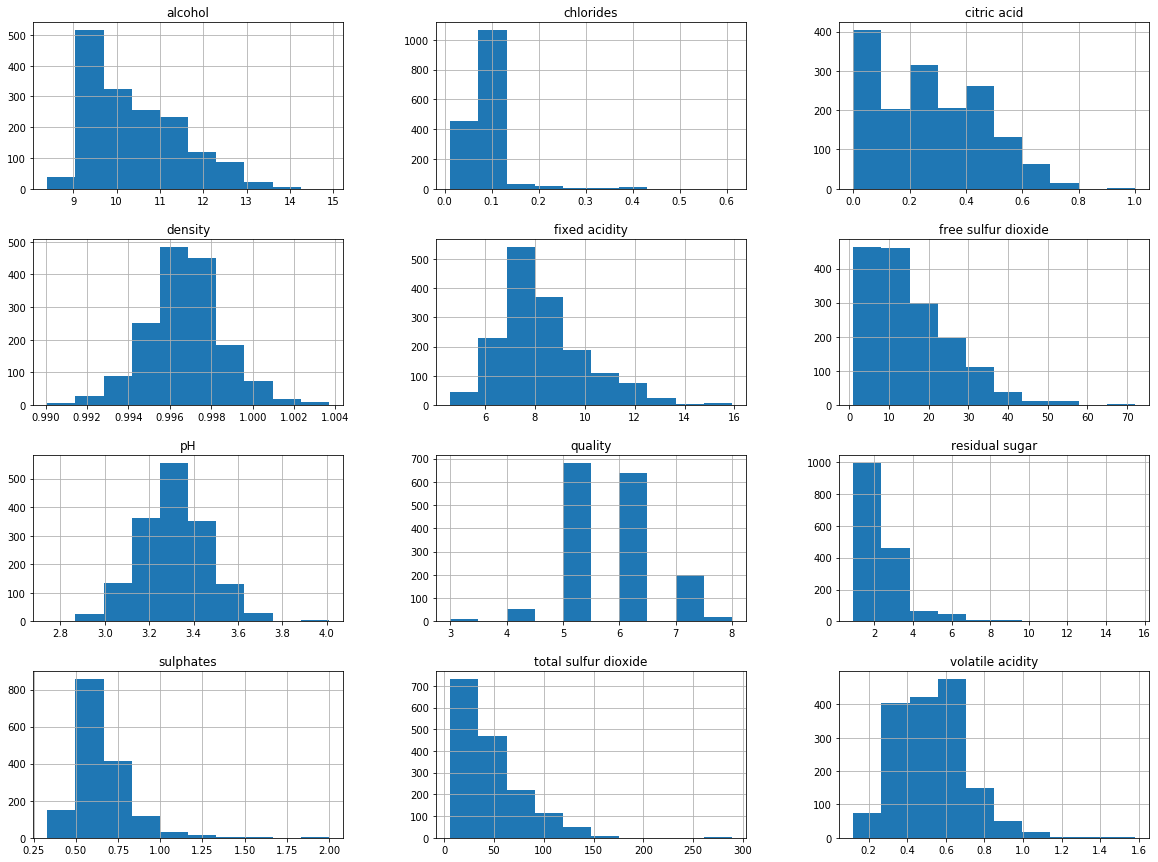

In [11]:
num_bins = 10

wine.hist(bins=num_bins, figsize=(20,15))
plt.savefig("wine_histogram_plots")
plt.show()

### Bar plot

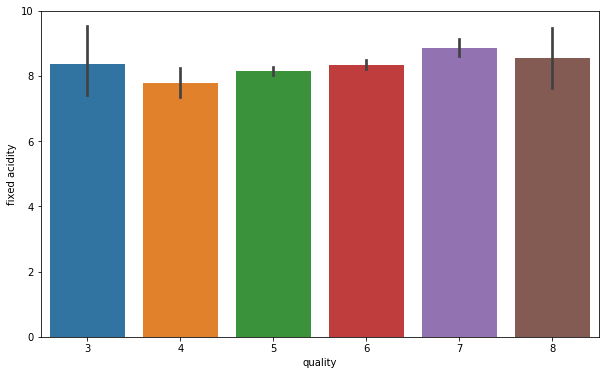

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)


* Here we see that fixed acidity does not give any specification to classify the quality.

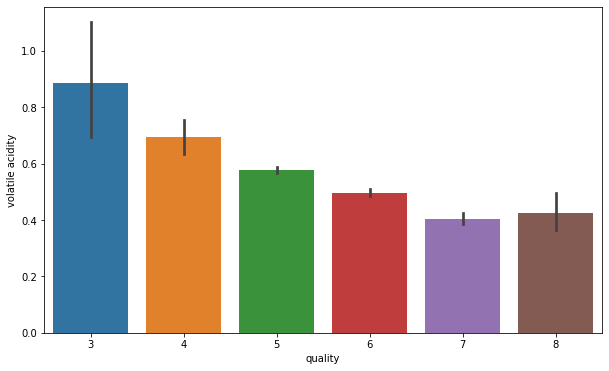

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)


* Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

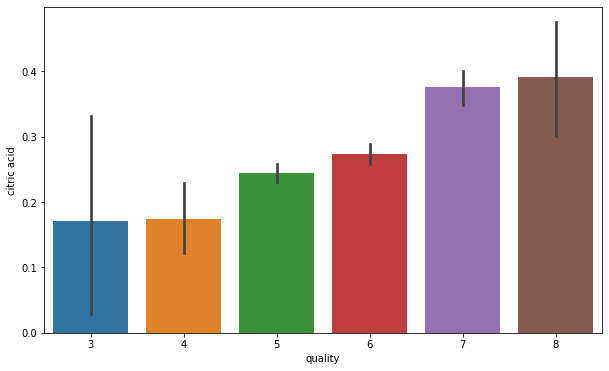

In [14]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

* Composition of citric acid go higher as we go higher in the quality of the wine

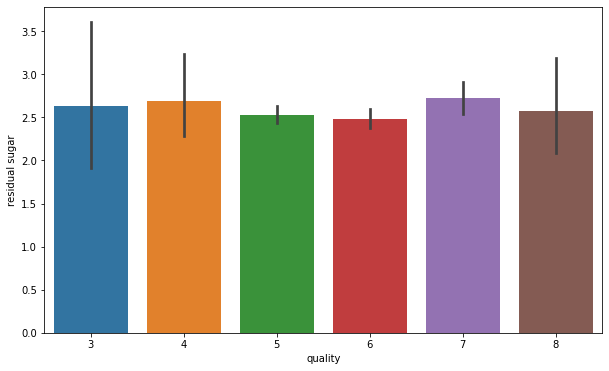

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

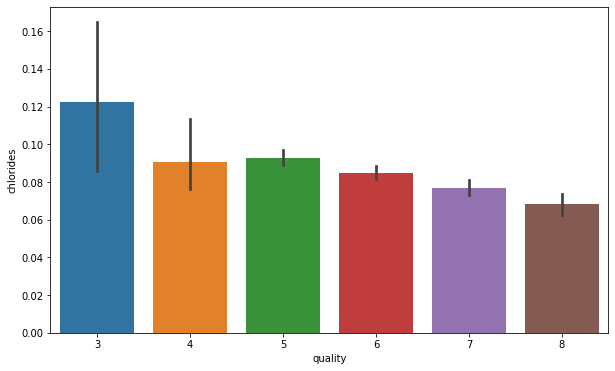

In [16]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

* Composition of chloride also go down as we go higher in the quality of the wine

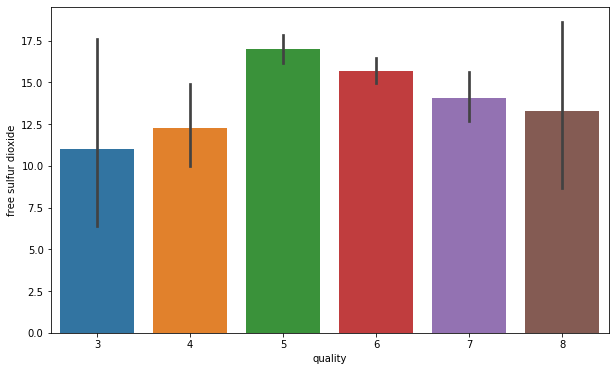

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

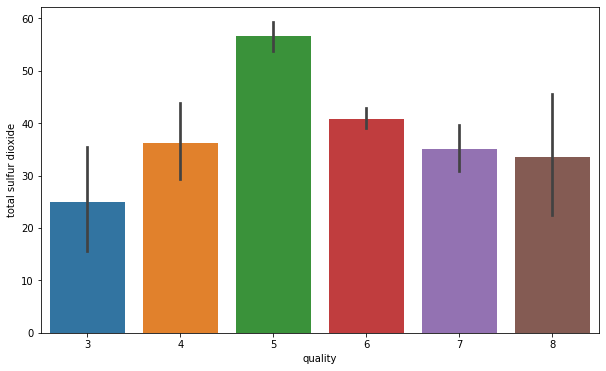

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

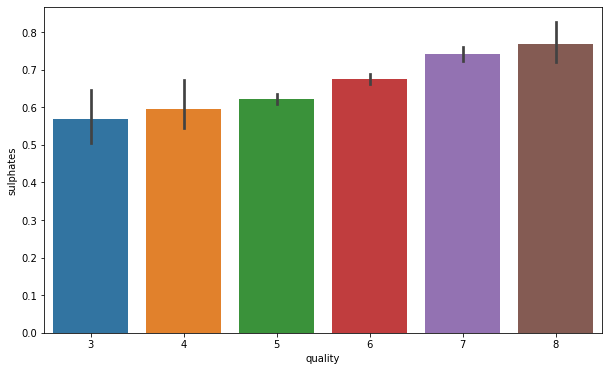

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)


* Sulphates level goes higher with the quality of wine

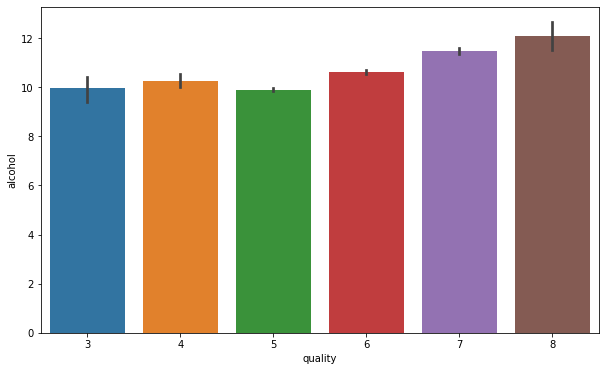

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

* Alcohol level also goes higher as the quality of wine increases

### Scatter plot

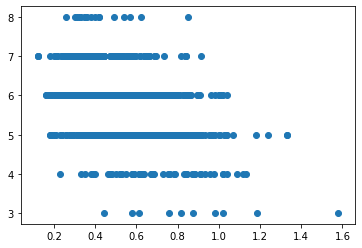

In [21]:
plt.figure()
x=wine["volatile acidity"]
y=wine["quality"]
plt.scatter(x,y)

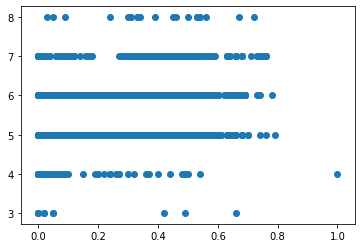

In [22]:
plt.figure()
x=wine["citric acid"]
y=wine["quality"]
plt.scatter(x,y)

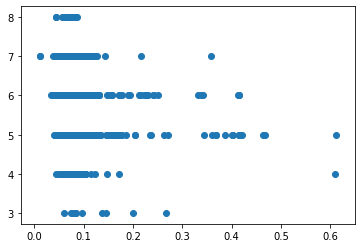

In [23]:
plt.figure()
x=wine["chlorides"]
y=wine["quality"]
plt.scatter(x,y)

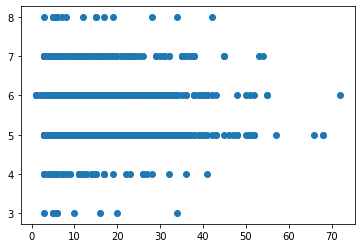

In [24]:
plt.figure()
x=wine["free sulfur dioxide"]
y=wine["quality"]
plt.scatter(x,y)

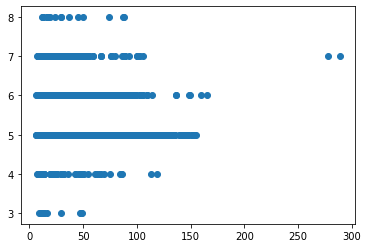

In [25]:
plt.figure()
x=wine["total sulfur dioxide"]
y=wine["quality"]
plt.scatter(x,y)

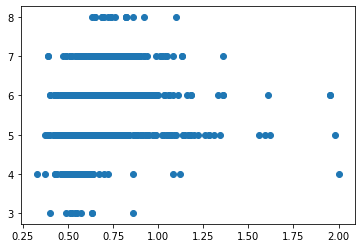

In [26]:
plt.figure()
x=wine["sulphates"]
y=wine["quality"]
plt.scatter(x,y)

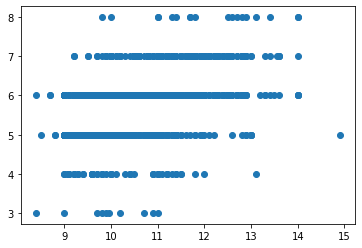

In [27]:
plt.figure()
x=wine["alcohol"]
y=wine["quality"]
plt.scatter(x,y)

### Box plots

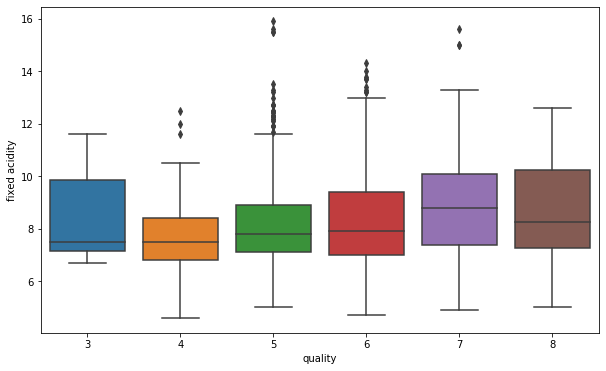

In [28]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'fixed acidity', data = wine)


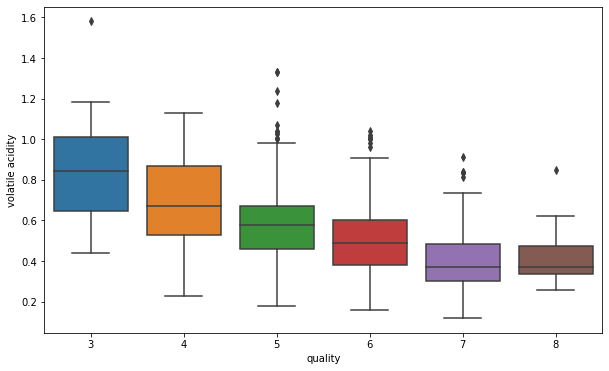

In [29]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'volatile acidity', data = wine)


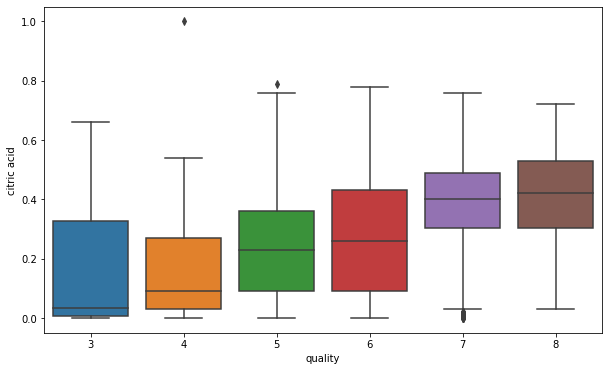

In [30]:

fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'citric acid', data = wine)

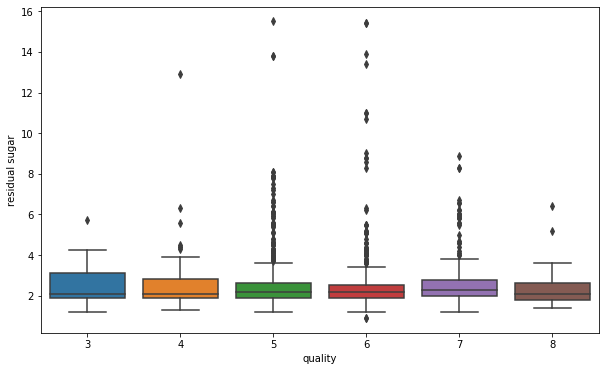

In [31]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'residual sugar', data = wine)

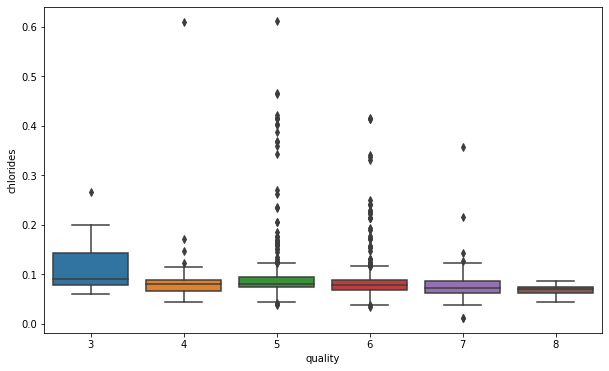

In [32]:

fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'chlorides', data = wine)

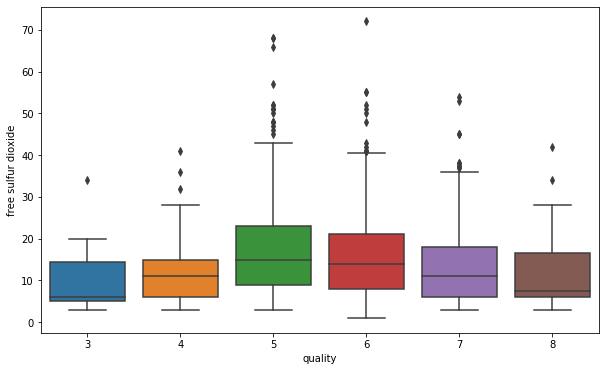

In [33]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

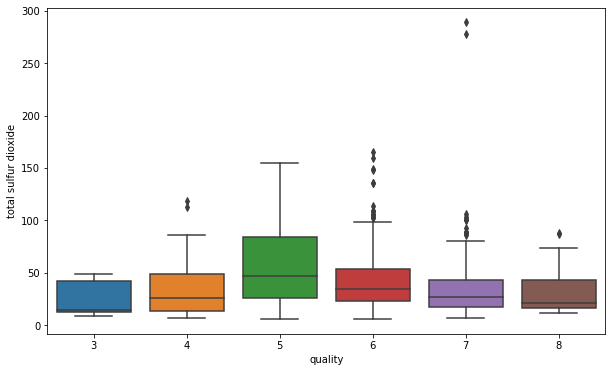

In [34]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

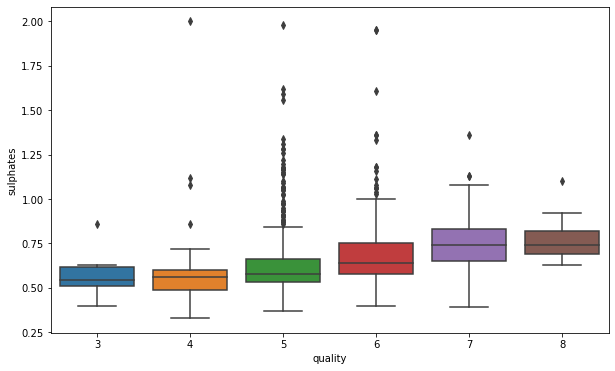

In [35]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'sulphates', data = wine)


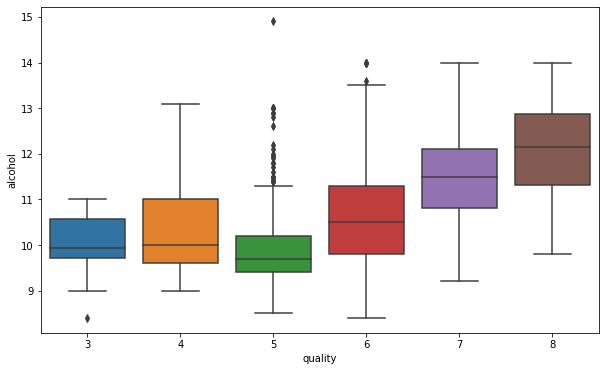

In [36]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'alcohol', data = wine)

## conclusion graph

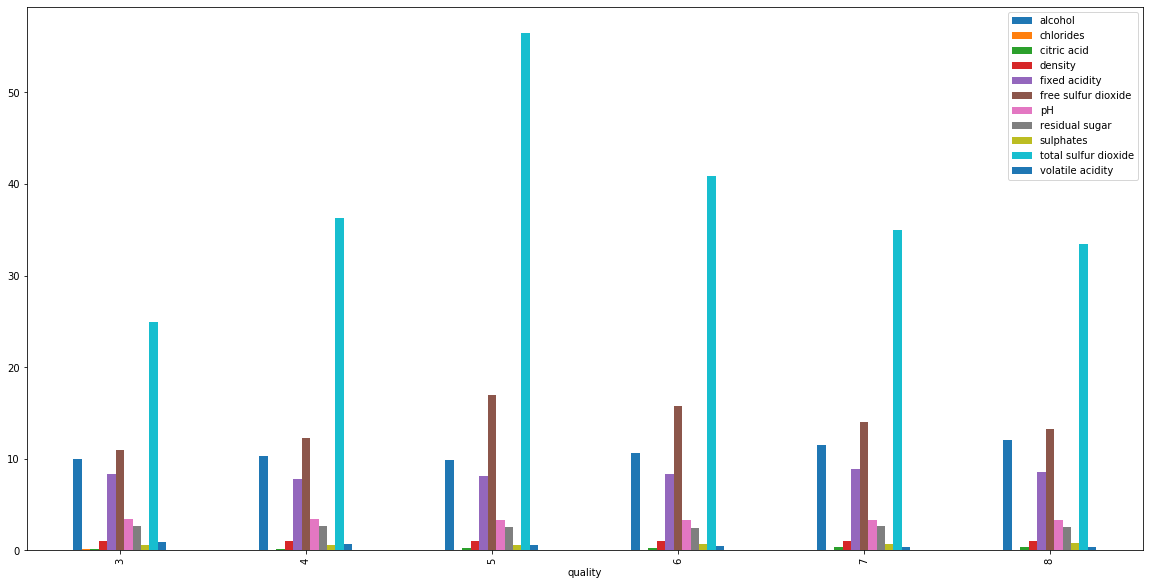

In [37]:
class_pivot =wine.pivot_table(index='quality')
class_pivot.plot.bar(figsize=(20,10))
plt.show()

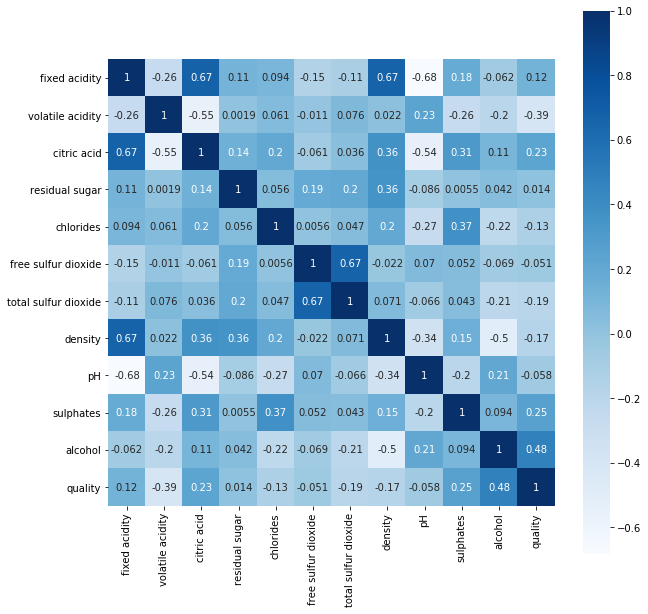

In [38]:
correlation = wine.corr()

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')
plt.savefig('Correlation_heatmap')

### Observations
 From above bar plots,we observed that the following Attributes are more appropriate in 'PREDICTING THE QUALITY OF WINE':
* volatile acidity
* citric acid
* chlorides
* free sulphur dioxide
* total sulphur dioxide
* sulphates
* alcohol level
* density

## Feature selection

In [39]:
cols=['volatile acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol','density']
X=wine[cols]
y=wine['quality']

In [40]:
X.describe()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.087467,15.874922,46.467792,0.658149,10.422983,0.996747
std,0.179060,0.194801,0.047065,10.460157,32.895324,0.169507,1.065668,0.001887
min,0.120000,0.000000,0.012000,1.000000,6.000000,0.330000,8.400000,0.990070
25%,0.390000,0.090000,0.070000,7.000000,22.000000,0.550000,9.500000,0.995600
50%,0.520000,0.260000,0.079000,14.000000,38.000000,0.620000,10.200000,0.996750
75%,0.640000,0.420000,0.090000,21.000000,62.000000,0.730000,11.100000,0.997835
max,1.580000,1.000000,0.611000,72.000000,289.000000,2.000000,14.900000,1.003690


In [41]:
X.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density
0,0.70,0.00,0.076,11.0,34.0,0.56,9.4,0.9978
1,0.88,0.00,0.098,25.0,67.0,0.68,9.8,0.9968
2,0.76,0.04,0.092,15.0,54.0,0.65,9.8,0.9970
3,0.28,0.56,0.075,17.0,60.0,0.58,9.8,0.9980
4,0.70,0.00,0.076,11.0,34.0,0.56,9.4,0.9978


In [42]:
all_X=wine[cols]
all_y=wine['quality']

In [43]:
from sklearn.preprocessing import StandardScaler
sc_all_X = StandardScaler()
all_X = sc_all_X.fit_transform(X)
all_X

array([[ 0.96187667, -1.39147228, -0.24370669, ..., -0.57920652,
        -0.96024611,  0.55827446],
       [ 1.96744245, -1.39147228,  0.2238752 , ...,  0.1289504 ,
        -0.58477711,  0.02826077],
       [ 1.29706527, -1.18607043,  0.09635286, ..., -0.04808883,
        -0.58477711,  0.13426351],
       ...,
       [-0.09955388, -0.72391627, -0.24370669, ...,  0.54204194,
         0.54162988, -0.53355375],
       [ 0.65462046, -0.77526673, -0.26496041, ...,  0.30598963,
        -0.20930812, -0.67665745],
       [-1.21684919,  1.02199944, -0.43499018, ...,  0.01092425,
         0.54162988, -0.66605717]])

In [44]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(all_X,all_y,test_size=0.25,random_state=0,stratify=y)

In [45]:
train_X.shape

(1199, 8)

In [46]:
test_X.shape

(400, 8)

## Multiclass Classifier

### K Neighbors classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier(n_neighbors=20)

knnmodel.fit(train_X,train_y)
predictions=knnmodel.predict(test_X)


In [48]:
from sklearn.metrics import accuracy_score

accuracy_knnm=accuracy_score(test_y,predictions)
print(accuracy_knnm)

0.5675


In [49]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(knnmodel,all_X,all_y,cv=10)
scores.sort()
accuracy_knn=scores.mean()
    
print(scores)
print(accuracy_knn)

[0.475      0.475      0.5125     0.525      0.54375    0.54716981
 0.575      0.58125    0.59375    0.65625   ]
0.5484669811320755


In [50]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predictions) 
cm

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   5,   8,   0,   0],
       [  0,   0, 120,  47,   3,   0],
       [  0,   0,  55,  88,  17,   0],
       [  0,   0,   6,  25,  19,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

Text(0.5, 1, 'knn_model')

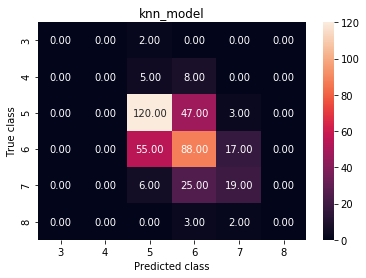

In [51]:
# heat map

sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["3","4","5","6","7","8"] , yticklabels = ["3","4","5","6","7","8"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('knn_model')

### Decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier(max_depth = 7,max_features='auto',random_state=0).fit(train_X, train_y) 
dtree_predictions = dtree_model.predict(test_X)


In [53]:
accuracy_dtm=accuracy_score(test_y,dtree_predictions)
print(accuracy_dtm)

0.5875


In [54]:
scores=cross_val_score(dtree_model,all_X,all_y,cv=10)
scores.sort()
accuracy_dt=scores.mean()
    
print(scores)
print(accuracy_dt)

[0.44375    0.45       0.4625     0.48125    0.50314465 0.53125
 0.53125    0.5625     0.56875    0.675     ]
0.520939465408805


In [55]:
# creating a confusion matrix 
cm = confusion_matrix(test_y, dtree_predictions) 
cm

array([[  0,   0,   2,   0,   0,   0],
       [  1,   0,   3,   8,   1,   0],
       [  0,   3, 110,  52,   4,   1],
       [  1,   0,  44, 101,  14,   0],
       [  0,   0,   4,  22,  24,   0],
       [  0,   0,   1,   0,   4,   0]], dtype=int64)

Text(0.5, 1, 'dt_model')

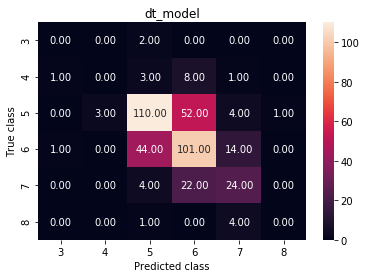

In [56]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["3","4","5","6","7","8"] , yticklabels = ["3","4","5","6","7","8"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('dt_model')

### Support vector machine

In [57]:
from sklearn.svm import SVC
svcmodel = SVC(kernel='rbf')
svcmodel.fit(train_X,train_y)
prediction = svcmodel.predict(test_X)
accuracy_svcm= accuracy_score(test_y,prediction) # can use for test or train
print(accuracy_svcm)

0.6425


In [58]:
scores=cross_val_score(svcmodel,all_X,all_y,cv=10)
scores.sort()
accuracy_svc=scores.mean()
    
print(scores)
print(accuracy_svc)

[0.50625    0.55       0.55625    0.5625     0.56875    0.59748428
 0.6125     0.6125     0.61875    0.66875   ]
0.5853734276729561


In [59]:
# creating a confusion matrix
cm = confusion_matrix(test_y, prediction) 
cm

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   9,   4,   0,   0],
       [  0,   0, 135,  35,   0,   0],
       [  0,   0,  48, 106,   6,   0],
       [  0,   0,   2,  32,  16,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

Text(0.5, 1, 'svc_model')

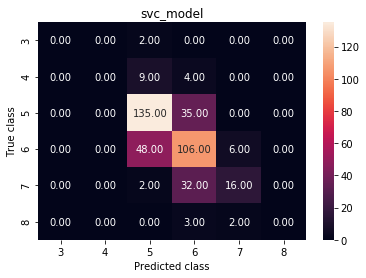

In [60]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["3","4","5","6","7","8"] , yticklabels = ["3","4","5","6","7","8"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('svc_model')

### Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
randommodel = RandomForestClassifier(n_estimators=150,max_depth=7,random_state=0)
randommodel.fit(train_X,train_y)

prediction_randommodel = randommodel.predict(test_X)
accuracy_randommodel= accuracy_score(test_y,prediction_randommodel) # can use for test or train
print(accuracy_randommodel)

0.6575


In [62]:
scores=cross_val_score(randommodel,all_X,all_y,cv=10)
scores.sort()
accuracy_rf=scores.mean()
    
print(scores)
print(accuracy_rf)

[0.525     0.53125   0.55      0.5625    0.5875    0.59375   0.60625
 0.60625   0.6163522 0.64375  ]
0.5822602201257862


In [63]:
cm = confusion_matrix(test_y, prediction_randommodel) 
cm

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   6,   7,   0,   0],
       [  0,   0, 135,  35,   0,   0],
       [  0,   0,  48, 106,   6,   0],
       [  0,   0,   2,  26,  22,   0],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

Text(0.5, 1, 'rf_model')

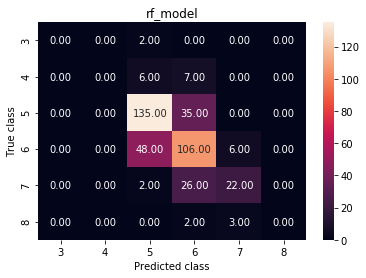

In [64]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["3","4","5","6","7","8"] , yticklabels = ["3","4","5","6","7","8"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('rf_model')

### Gaussian Naive bayes classifier

In [65]:
from sklearn.naive_bayes import GaussianNB
gaussianmodel=  GaussianNB()
gaussianmodel.fit(train_X,train_y)
prediction_gaussianmodel = gaussianmodel.predict(test_X)
accuracy_gaussianmodel= accuracy_score(test_y,prediction_gaussianmodel) # can use for test or train
print(accuracy_gaussianmodel)

0.5725


In [66]:
scores=cross_val_score(gaussianmodel,all_X,all_y,cv=10)
scores.sort()
accuracy_gnb=scores.mean()
    
print(scores)
print(accuracy_gnb)

[0.4875     0.5125     0.525      0.53125    0.54375    0.54375
 0.58125    0.5875     0.59748428 0.625     ]
0.553498427672956


In [67]:
cm = confusion_matrix(test_y, prediction_randommodel) 
cm

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   6,   7,   0,   0],
       [  0,   0, 135,  35,   0,   0],
       [  0,   0,  48, 106,   6,   0],
       [  0,   0,   2,  26,  22,   0],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

Text(0.5, 1, 'gnb_model')

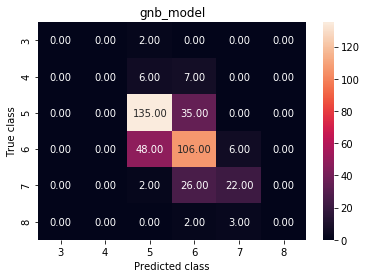

In [68]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["3","4","5","6","7","8"] , yticklabels = ["3","4","5","6","7","8"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('gnb_model')

# Binary classification

In [69]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [70]:
#Now lets assign a labels to our quality variable
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [71]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [72]:
X=wine[cols]
y=wine['quality']

In [73]:
X.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density
0,0.70,0.00,0.076,11.0,34.0,0.56,9.4,0.9978
1,0.88,0.00,0.098,25.0,67.0,0.68,9.8,0.9968
2,0.76,0.04,0.092,15.0,54.0,0.65,9.8,0.9970
3,0.28,0.56,0.075,17.0,60.0,0.58,9.8,0.9980
4,0.70,0.00,0.076,11.0,34.0,0.56,9.4,0.9978


In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [75]:
#Feature Scaleing
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 0.96187667, -1.39147228, -0.24370669, ..., -0.57920652,
        -0.96024611,  0.55827446],
       [ 1.96744245, -1.39147228,  0.2238752 , ...,  0.1289504 ,
        -0.58477711,  0.02826077],
       [ 1.29706527, -1.18607043,  0.09635286, ..., -0.04808883,
        -0.58477711,  0.13426351],
       ...,
       [-0.09955388, -0.72391627, -0.24370669, ...,  0.54204194,
         0.54162988, -0.53355375],
       [ 0.65462046, -0.77526673, -0.26496041, ...,  0.30598963,
        -0.20930812, -0.67665745],
       [-1.21684919,  1.02199944, -0.43499018, ...,  0.01092425,
         0.54162988, -0.66605717]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

### Logistic regression

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=50,max_iter=500,random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
from sklearn.metrics import accuracy_score,f1_score

accuracy_log = accuracy_score(y_train, logreg.predict(X_train))

f1_score_log = f1_score(y_train, logreg.predict(X_train))

print('Logistic regression accuracy: {:.3f}'.format(accuracy_log))
print('Logistic regression f1 score: {:.3f}'.format(f1_score_log))

Logistic regression accuracy: 0.888
Logistic regression f1 score: 0.477


In [79]:
accuracy_log = accuracy_score(y_test, logreg.predict(X_test))
acc = {'LogisticRegression' : accuracy_log}

f1_score_log = f1_score(y_test, logreg.predict(X_test))
f1 = {'LogisticRegression' : f1_score_log}

print('Logistic regression accuracy: {:.3f}'.format(accuracy_log))
print('Logistic regression f1 score: {:.3f}'.format(f1_score_log))

Logistic regression accuracy: 0.845
Logistic regression f1 score: 0.367


In [80]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(logreg,X,y,cv=10)
scores.sort()
accuracy_log_cv=scores.mean()
acc_cv = {'LogisticRegression' : accuracy_log_cv}
    
print(scores)
print(accuracy_log_cv)

[0.83125    0.85       0.85       0.8625     0.86875    0.86875
 0.86875    0.8875     0.89937107 0.90625   ]
0.8693121069182389


In [81]:
prediction_log= logreg.predict(X_test)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_log))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       346
           1       0.41      0.33      0.37        54

    accuracy                           0.84       400
   macro avg       0.65      0.63      0.64       400
weighted avg       0.83      0.84      0.84       400



In [83]:
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test, prediction_log) 
cm_log

array([[320,  26],
       [ 36,  18]], dtype=int64)

Text(0.5, 1, 'log_model')

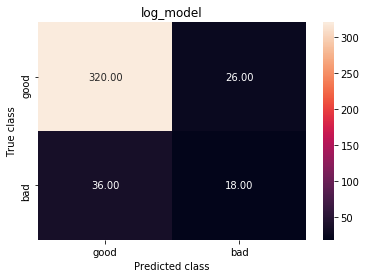

In [84]:
sns.heatmap(cm_log, annot=True, fmt='.2f',xticklabels = ["good", "bad"] , yticklabels = ["good", "bad"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('log_model')

### K Neighbors classifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knnmodel = KNN(n_neighbors=10)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [86]:
accuracy_knnmodel=accuracy_score(y_train, knnmodel.predict(X_train))

f1_score_knnmodel=f1_score(y_train, knnmodel.predict(X_train))

print('KNeighbors accuracy: {:.3f}'.format(accuracy_knnmodel))
print('KNeighbors f1 score: {:.3f}'.format(f1_score_knnmodel))

KNeighbors accuracy: 0.903
KNeighbors f1 score: 0.564


In [87]:
accuracy_knnmodel=accuracy_score(y_test, knnmodel.predict(X_test))
acc = {'KNeighbors': accuracy_knnmodel}

f1_score_knnmodel=f1_score(y_test, knnmodel.predict(X_test))
f1 = {'KNeighbors': f1_score_knnmodel}

print('KNeighbors accuracy: {:.3f}'.format(accuracy_knnmodel))
print('KNeighbors f1 score: {:.3f}'.format(f1_score_knnmodel))

KNeighbors accuracy: 0.870
KNeighbors f1 score: 0.409


In [88]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(knnmodel,X,y,cv=10)
scores.sort()
accuracy_knnmodel_cv=scores.mean()
acc_cv = {'KNeighbors': accuracy_knnmodel_cv}

print(scores)
print(accuracy_knnmodel_cv)

[0.8375     0.8375     0.84375    0.8625     0.86875    0.86875
 0.875      0.88125    0.89308176 0.89375   ]
0.866183176100629


In [89]:
prediction_knnmodel = knnmodel.predict(X_test)

In [90]:
print(classification_report(y_test,prediction_knnmodel))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       346
           1       0.53      0.33      0.41        54

    accuracy                           0.87       400
   macro avg       0.72      0.64      0.67       400
weighted avg       0.85      0.87      0.86       400



In [91]:
cm_knnmodel = confusion_matrix(y_test, prediction_knnmodel) 
cm_knnmodel

array([[330,  16],
       [ 36,  18]], dtype=int64)

Text(0.5, 1, 'knn_model')

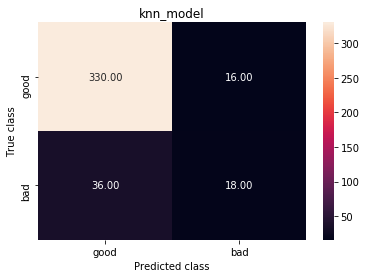

In [92]:
sns.heatmap(cm_knnmodel, annot=True, fmt='.2f',xticklabels = ["good", "bad"] , yticklabels = ["good", "bad"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('knn_model')

### Decision tree

In [93]:
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier(max_depth = 6,max_features='auto',random_state=0)
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [94]:
accuracy_dtree_model=accuracy_score(y_train, dtree_model.predict(X_train))

f1_score_dtree_model=f1_score(y_train, dtree_model.predict(X_train))

print('Decision Tree accuracy: {:.3f}'.format(accuracy_dtree_model))
print('Decision Tree f1 score: {:.3f}'.format(f1_score_dtree_model))

Decision Tree accuracy: 0.912
Decision Tree f1 score: 0.649


In [95]:
accuracy_dtree_model=accuracy_score(y_test, dtree_model.predict(X_test))
acc.update({'DecisionTree': accuracy_dtree_model})

f1_score_dtree_model=f1_score(y_test, dtree_model.predict(X_test))
f1.update({'DecisionTree': f1_score_dtree_model})

print('Decision Tree accuracy: {:.3f}'.format(accuracy_dtree_model))
print('Decision Tree f1 score: {:.3f}'.format(f1_score_dtree_model))

Decision Tree accuracy: 0.853
Decision Tree f1 score: 0.416


In [96]:
scores=cross_val_score(dtree_model,X,y,cv=10)
scores.sort()
accuracy_dtree_model_cv=scores.mean()
acc_cv.update({'DecisionTree': accuracy_dtree_model_cv})

print(scores)
print(accuracy_dtree_model_cv)

[0.7625     0.775      0.84375    0.85534591 0.85625    0.85625
 0.8625     0.875      0.89375    0.9       ]
0.8480345911949685


In [97]:
prediction_dtree_model = dtree_model.predict(X_test)

In [98]:
print(classification_report(y_test,prediction_dtree_model))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       346
           1       0.45      0.39      0.42        54

    accuracy                           0.85       400
   macro avg       0.68      0.66      0.67       400
weighted avg       0.84      0.85      0.85       400



In [99]:
cm_dtree_model = confusion_matrix(y_test, prediction_dtree_model) 
cm_dtree_model

array([[320,  26],
       [ 33,  21]], dtype=int64)

Text(0.5, 1, 'dtree_model')

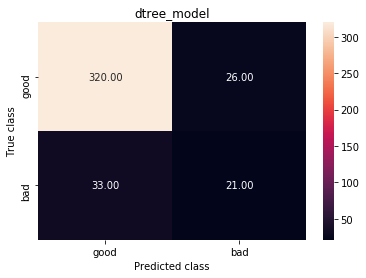

In [100]:
sns.heatmap(cm_dtree_model, annot=True, fmt='.2f',xticklabels = ["good", "bad"] , yticklabels = ["good", "bad"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('dtree_model')

### Random forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=200,max_depth=6,random_state=0)
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [102]:
accuracy_rfm=accuracy_score(y_train, rfm.predict(X_train))

f1_score_rfm=f1_score(y_train, rfm.predict(X_train))

print('Random Forest accuracy: {:.3f}'.format(accuracy_rfm))
print('Random Forest f1 score: {:.3f}'.format(f1_score_rfm))

Random Forest accuracy: 0.949
Random Forest f1 score: 0.773


In [103]:
accuracy_rfm=accuracy_score(y_test, rfm.predict(X_test))
acc.update({'RandomForest': accuracy_rfm})

f1_score_rfm=f1_score(y_test, rfm.predict(X_test))
f1.update({'RandomForest': f1_score_rfm})

print('Random Forest accuracy: {:.3f}'.format(accuracy_rfm))
print('Random Forest f1 score: {:.3f}'.format(f1_score_rfm))

Random Forest accuracy: 0.880
Random Forest f1 score: 0.429


In [104]:
scores=cross_val_score(rfm,X,y,cv=10)
scores.sort()
accuracy_rfm_cv=scores.mean()
acc_cv.update({'RandomForest': accuracy_rfm_cv})
    
print(scores)
print(accuracy_rfm_cv)

[0.85       0.85625    0.88125    0.88125    0.8875     0.8875
 0.8875     0.8875     0.89308176 0.89375   ]
0.8805581761006289


In [105]:
prediction_rfm= rfm.predict(X_test)

In [106]:
print(classification_report(y_test,prediction_rfm))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       346
           1       0.60      0.33      0.43        54

    accuracy                           0.88       400
   macro avg       0.75      0.65      0.68       400
weighted avg       0.86      0.88      0.86       400



In [107]:
cm_rfm = confusion_matrix(y_test, prediction_rfm) 
cm_rfm

array([[334,  12],
       [ 36,  18]], dtype=int64)

Text(0.5, 1, 'rfm_model')

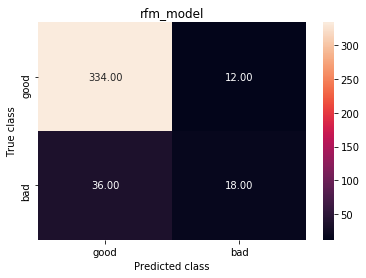

In [108]:
sns.heatmap(cm_rfm, annot=True, fmt='.2f',xticklabels = ["good", "bad"] , yticklabels = ["good", "bad"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('rfm_model')

### Support Vector Machine model

In [109]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [110]:
accuracy_svm=accuracy_score(y_train, svm.predict(X_train))

f1_score_svm=f1_score(y_train, svm.predict(X_train))

print('SVM accuracy: {:.3f}'.format(accuracy_svm))
print('SVM f1 score: {:.3f}'.format(f1_score_svm))

SVM accuracy: 0.902
SVM f1 score: 0.494


In [111]:
accuracy_svm=accuracy_score(y_test, svm.predict(X_test))
acc.update({'SupportVectorMachine': accuracy_svm})

f1_score_svm=f1_score(y_test, svm.predict(X_test))
f1.update({'SupportVectorMachine': f1_score_svm})

print('SVM accuracy: {:.3f}'.format(accuracy_svm))
print('SVM f1 score: {:.3f}'.format(f1_score_svm))

SVM accuracy: 0.873
SVM f1 score: 0.320


In [112]:
scores=cross_val_score(svm,X,y,cv=10)
scores.sort()
accuracy_svm_cv=scores.mean()
acc_cv.update({'SupportVectorMachine': accuracy_svm_cv})
    
print(scores)
print(accuracy_svm_cv)

[0.85       0.8625     0.86875    0.875      0.88125    0.88125
 0.88679245 0.8875     0.8875     0.89375   ]
0.8774292452830188


In [113]:
prediction_svm = svm.predict(X_test)

In [114]:
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       346
           1       0.57      0.22      0.32        54

    accuracy                           0.87       400
   macro avg       0.73      0.60      0.62       400
weighted avg       0.85      0.87      0.85       400



In [115]:
cm_svm = confusion_matrix(y_test, prediction_svm) 
cm_svm

array([[337,   9],
       [ 42,  12]], dtype=int64)

Text(0.5, 1, 'svm_model')

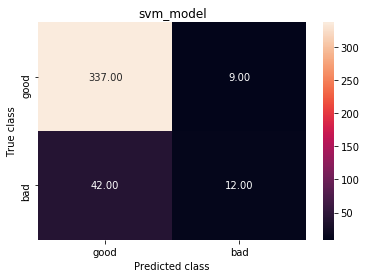

In [116]:
sns.heatmap(cm_svm, annot=True, fmt='.2f',xticklabels = ["good", "bad"] , yticklabels = ["good", "bad"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('svm_model')

### Gaussian Naive bayes classifier

In [117]:
from sklearn.naive_bayes import GaussianNB
gaussian_model=  GaussianNB()
gaussian_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
accuracy_gaussian_model=accuracy_score(y_train, gaussian_model.predict(X_train))

f1_score_gaussian_model=f1_score(y_train, gaussian_model.predict(X_train))

print('Gaussian Naive bayes accuracy: {:.3f}'.format(accuracy_gaussian_model))
print('Gaussian Naive bayes f1 score: {:.3f}'.format(f1_score_gaussian_model))

Gaussian Naive bayes accuracy: 0.860
Gaussian Naive bayes f1 score: 0.560


In [119]:
accuracy_gaussian_model=accuracy_score(y_test, gaussian_model.predict(X_test))
acc.update({'Gaussianmodel': accuracy_gaussian_model})

f1_score_gaussian_model=f1_score(y_test, gaussian_model.predict(X_test))
f1.update({'Gaussianmodel': f1_score_gaussian_model})

print('Gaussian Naive bayes accuracy: {:.3f}'.format(accuracy_gaussian_model))
print('Gaussian Naive bayes f1 score: {:.3f}'.format(f1_score_gaussian_model))

Gaussian Naive bayes accuracy: 0.838
Gaussian Naive bayes f1 score: 0.496


In [120]:
scores=cross_val_score(gaussian_model,X,y,cv=10)
scores.sort()
accuracy_gaussian_model_cv=scores.mean()
acc_cv.update({'Gaussianmodel': accuracy_gaussian_model_cv})

print(scores)
print(accuracy_gaussian_model_cv)

[0.66875    0.7625     0.83647799 0.8375     0.8375     0.86875
 0.875      0.89375    0.90625    0.91875   ]
0.8405227987421384


In [121]:
prediction_gaussian_model = gaussian_model.predict(X_test)

In [122]:
print(classification_report(y_test,prediction_gaussian_model))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       346
           1       0.43      0.59      0.50        54

    accuracy                           0.84       400
   macro avg       0.68      0.73      0.70       400
weighted avg       0.86      0.84      0.85       400



In [123]:
cm_gaussian_model = confusion_matrix(y_test, prediction_gaussian_model) 
cm_gaussian_model

array([[303,  43],
       [ 22,  32]], dtype=int64)

Text(0.5, 1, 'gaussian model')

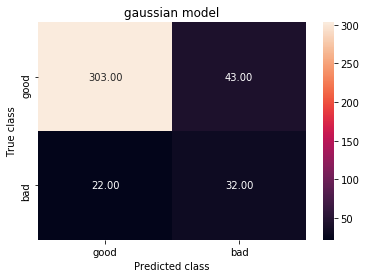

In [124]:
sns.heatmap(cm_gaussian_model, annot=True, fmt='.2f',xticklabels = ["good", "bad"] , yticklabels = ["good", "bad"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('gaussian model')

## Performance metrics of different models

### Multiclass classification

In [125]:
#accuracy
print(accuracy_knnm,accuracy_dtm,accuracy_svcm,accuracy_randommodel,accuracy_gaussianmodel)

0.5675 0.5875 0.6425 0.6575 0.5725


In [126]:
#accuracy after cross validation
print(accuracy_knn,accuracy_dt,accuracy_svc,accuracy_rf,accuracy_gnb,accuracy_log)

0.5484669811320755 0.520939465408805 0.5853734276729561 0.5822602201257862 0.553498427672956 0.845


### Binary classification

In [127]:
#accuracy before cross validation
print(acc)

{'KNeighbors': 0.87, 'DecisionTree': 0.8525, 'RandomForest': 0.88, 'SupportVectorMachine': 0.8725, 'Gaussianmodel': 0.8375}


In [128]:
#accuracy after cross validation
print(acc_cv)

{'KNeighbors': 0.866183176100629, 'DecisionTree': 0.8480345911949685, 'RandomForest': 0.8805581761006289, 'SupportVectorMachine': 0.8774292452830188, 'Gaussianmodel': 0.8405227987421384}


In [129]:
# f1 scores
print(f1)

{'KNeighbors': 0.409090909090909, 'DecisionTree': 0.4158415841584158, 'RandomForest': 0.42857142857142855, 'SupportVectorMachine': 0.32, 'Gaussianmodel': 0.49612403100775193}


## Saving the model to disk

In [130]:
import joblib

In [131]:
filename = 'model_rfm.pkl'
joblib.dump(rfm,open(filename,'wb'))